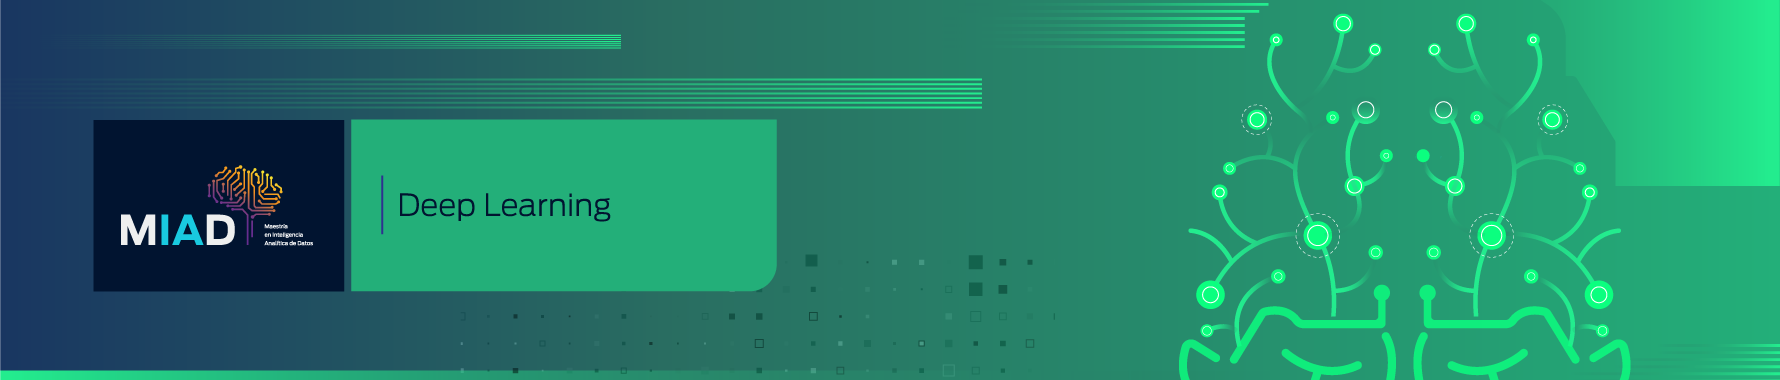



## Estimación de red neuronal con múltiples capas (Multilayer Perceptor)

### Propósito 

En este *notebook*, deberán aplicar sus conocimientos sobre la construcción y calibración de una red neuronal de tipo _feedforward_. Para ello, deberán entregar un _notebook_ en el cual se desarrolle una red neuronal de dos capas ocultas y cuya calibración se realice con el método de gradiente descendiente.

### Instrucciones generales

1. Descarguen este *notebook* y agréguenlo al repositorio de su preferencia  para que lo puedan trabajar grupalmente.

2. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso. Nota: el archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Pasos para implementar manualmente el algoritmo de descenso de gradiente

1. Cargar los datos 
2. Separar la muestra 
3. Definir funciones de la red neuronal
4. Realizar el ensamblaje de la función de red neuronal
5. Predecir utilizando la red neuronal 
6. Evaluar la predicción

### 1. Cargar los datos

Para realizar la actividad, cargue los datos a usar en este *notebook*  que fueron extraídos de imágenes que fueron tomadas de billetes. Para su digitalización, se utilizó una cámara industrial usada para la impresión. Luego, las imágenes de 400x400 pixeles se sometieron a un procedimiento de transformación de onda (Wavelet transformation) con la intención de extraer los features para la predicción.

En este contexto, la variable de respuesta corresponde a si un billete es auténtico (y=1) o si no lo es (y=0) y las variables predictivas son las siguientes:


1. *variance* *of* *Wavelet* *Transformed* *image* *(continuous)*
2. *skewness* *of* *Wavelet* *Transformed* *image* *(continuous)*
3. *curtosis* *of* *Wavelet* *Transformed* *image* *(continuous)*
4. *entropy* *of* *image* *(continuous)*

In [2]:
data = np.genfromtxt('data_banknote_authentication.txt', delimiter = ',')
X = data[:,:4]
y = data[:, 4]

Luego, realice la separación de los datos en entrenamiento y evaluación. Además, podemos observar las dimensiones de estos datos como se muestra a continuación:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste de dimension para las Y
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print ('X Train dimensiones: ', X_train.shape)
print ('Y Train dimensiones: ', y_train.shape)
print ('X Test dimensiones: ', X_test.shape)
print ('Y Test dimensiones: ', y_test.shape)

X Train dimensiones:  (1097, 4)
Y Train dimensiones:  (1097, 1)
X Test dimensiones:  (275, 4)
Y Test dimensiones:  (275, 1)


### Actividad de programación

Para esta actividad deberán construir una red neuronal con un diseño particular y un procedimiento de gradiente descendiente para la estimación de los parámetros de dicha red, sin el uso de librerías adicionales a las que se cargaron inicialmente en este notebook. A continuación se muestra la estructura de la red neuronal que se solicita:

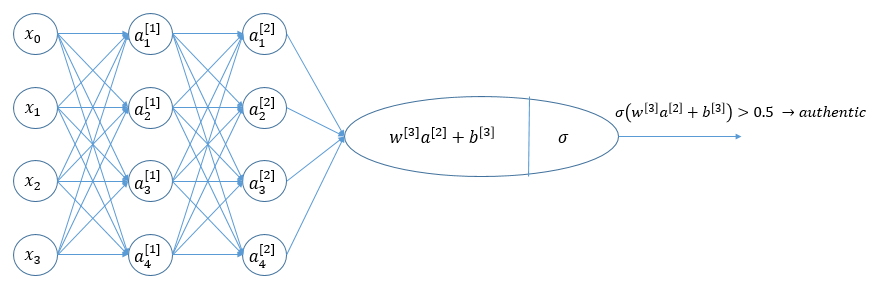

Figura 1. Diagrama de red neuronal de dos capas ocultas. 

Como se puede observar, se está solicitando una red neuronal de clasificación con dos capas ocultas, cada una de ellas con cuatro nodos.
Para lograr lo anterior, en esta actividad se espera que utilice como base el notebook "Redes neuronales: calibración de una red neuronal de una capa".

In [4]:
def estructuras(X, Y):
    input_unit = X.shape[1]          # Dimensión de entrada
    hidden1_unit = 4                 # Primer capa oculta
    hidden2_unit = 4                 # Segunda capa oculta
    output_unit = Y.shape[1]         # Dimensión de salida
    
    return input_unit, hidden1_unit, hidden2_unit, output_unit


In [5]:
def inicializacion(input_unit, hidden_unit1, hidden_unit2, output_unit):
    np.random.seed(2)

    W1 = np.random.randn(input_unit, hidden_unit1) * 0.01
    b1 = np.zeros((1, hidden_unit1))

    W2 = np.random.randn(hidden_unit1, hidden_unit2) * 0.01
    b2 = np.zeros((1, hidden_unit2))

    W3 = np.random.randn(hidden_unit2, output_unit) * 0.01
    b3 = np.zeros((1, output_unit))

    parametros = {
        "W1": W1, "b1": b1,
        "W2": W2, "b2": b2,
        "W3": W3, "b3": b3
    }

    return parametros

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def forward_propagation(X, parameters):
    
    #Se cargan los valores de los parámetros
    
    W1 = parameters['W1'] #Valor de los pesos de la primera capa
    b1 = parameters['b1'] #Valor de los interceptos de la primera capa
    W2 = parameters['W2'] #Valor de los pesos de la segunda capa
    b2 = parameters['b2'] #Valor de los interceptos de la segunda capa'
    
    W3 = parameters['W3'] #Valor de los pesos de la salida
    b3 = parameters['b3'] #Valor de los interceptos de la salida'
    
    
    Z1 = np.dot(X, W1) + b1 #Cálculo de la transformación afín de la primera capa
    A1 = sigmoid(Z1) #Evaluación de la función sigmoide de la primera capa
    Z2 = np.dot(A1, W2) + b2 #Cálculo de la transformación afín de la segunda capa
    A2 = sigmoid(Z2) #Evaluación de la función sigmoide de la segunda capa

    Z3 = np.dot(A2, W3) + b3 #Cálculo de la transformación afín de la salida
    A3 = sigmoid(Z3) #Evaluación de la función sigmoide de la salida
    
    
    cache = {
        "Z1": Z1, "A1": A1,
        "Z2": Z2, "A2": A2,
        "Z3": Z3, "A3": A3
    }
    
    return A3, cache

In [8]:
def cross_entropy_cost(A3, Y, parameters):
    # Muestras de entrenamiento
    n = Y.shape[0] 
    
    # Calcular cross entropy
    logprobs = np.multiply(np.log(A3), Y) + np.multiply((1-Y), np.log(1 - A3))
    cost = - np.sum(logprobs) / n
    cost = float(np.squeeze(cost))    
    
    return cost

In [9]:
def backward_propagation(parameters, cache, X, Y):
    n = X.shape[0]  # número de ejemplos

    # Recuperamos variables
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']  # salida final

    # Cálculo de gradientes
    dZ3 = (1/n) * (A3 - Y)
    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dZ2 = np.multiply(np.dot(dZ3, W3.T), A2 - np.power(A2, 2)) 
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = np.multiply(np.dot(dZ2, W2.T), A1 - np.power(A1, 2))
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Guardamos gradientes
    grads = {
        "dW3": dW3, "db3": db3,
        "dW2": dW2, "db2": db2,
        "dW1": dW1, "db1": db1
    }
    
    return grads

In [10]:
def gradient_descent(parameters, grads, learning_rate = 0.001):
    # Extraer parámetros actuales
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Extraer gradientes
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    
    # Actualizar parámetros con la regla de descenso del gradiente
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    # Guardar parámetros actualizados
    parameters = {
        "W1": W1, "b1": b1,
        "W2": W2, "b2": b2,
        "W3": W3, "b3": b3
    }
    
    return parameters

In [11]:
X=X_train
Y=y_train

hidden_unit1=4
hidden_unit2=4
num_iterations=15000
input_unit = estructuras(X, Y)[0]
output_unit = estructuras(X, Y)[3]

#Se inicializan los parámetros de manera aleatoria
parameters = inicializacion(input_unit, hidden_unit1, hidden_unit2, output_unit)
   
W1 = parameters['W1']
b1 = parameters['b1']
W2 = parameters['W2']
b2 = parameters['b2']

W3 = parameters['W3']
b3 = parameters['b3']
costs=[]

In [12]:
def neural_network_model(X, Y, hidden1, hidden2, num_iterations=10000):
    np.random.seed(3)

    input_unit = estructuras(X, Y)[0]
    output_unit = estructuras(X, Y)[3]

    # Inicialización para dos capas ocultas
    parameters = inicializacion(input_unit, hidden1, hidden2, output_unit)

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    costs=[]

    for i in range(num_iterations):
        
        A3, cache = forward_propagation(X, parameters) #Se calcula la salida de la red para los datos utilizados y los valores de los parámetros para cada iteración
        
        cost = cross_entropy_cost(A3, Y, parameters) #Se calcula la función de costos
        
        costs.append(cost) #Se guardan el valor de la función de costos para cada iteración
        
        grads = backward_propagation(parameters, cache, X, Y) #Se calcula el gradiente de la función de costos utilizando el método de backpropagation para cada iteración
        
        parameters = gradient_descent(parameters, grads) #Se actualiza el valor de los parámetros de acuerdo al gradiente calculado en cada iteración
        
        if i % 5 == 0:
            print ("Costo en la iteracion  %i: %f" %(i, cost))
            
    return parameters, costs



parameters, costs = neural_network_model(X_train, y_train, hidden1=4, hidden2=4, num_iterations=15000)


Costo en la iteracion  0: 0.692976
Costo en la iteracion  5: 0.692941
Costo en la iteracion  10: 0.692907
Costo en la iteracion  15: 0.692872
Costo en la iteracion  20: 0.692838
Costo en la iteracion  25: 0.692804
Costo en la iteracion  30: 0.692771
Costo en la iteracion  35: 0.692737
Costo en la iteracion  40: 0.692703
Costo en la iteracion  45: 0.692670
Costo en la iteracion  50: 0.692637
Costo en la iteracion  55: 0.692604
Costo en la iteracion  60: 0.692571
Costo en la iteracion  65: 0.692539
Costo en la iteracion  70: 0.692506
Costo en la iteracion  75: 0.692474
Costo en la iteracion  80: 0.692442
Costo en la iteracion  85: 0.692410
Costo en la iteracion  90: 0.692378
Costo en la iteracion  95: 0.692346
Costo en la iteracion  100: 0.692315
Costo en la iteracion  105: 0.692283
Costo en la iteracion  110: 0.692252
Costo en la iteracion  115: 0.692221
Costo en la iteracion  120: 0.692190
Costo en la iteracion  125: 0.692159
Costo en la iteracion  130: 0.692129
Costo en la iteracion  

In [13]:
def prediction(parameters, X):
    A3, cache = forward_propagation(X, parameters)
    predictions = np.round(A3)
    return predictions

In [14]:
predictions = prediction(parameters, X_train)
print ('Accuracy Train: %d' % float((np.dot(y_train.T, predictions) + np.dot(1 - y_train.T, 1 - predictions))/float(y_train.size)*100) + '%')
predictions = prediction(parameters, X_test)
print ('Accuracy Test: %d' % float((np.dot(y_test.T, predictions) + np.dot(1 - y_test.T, 1 - predictions))/float(y_test.size)*100) + '%')

Accuracy Train: 55%
Accuracy Test: 53%


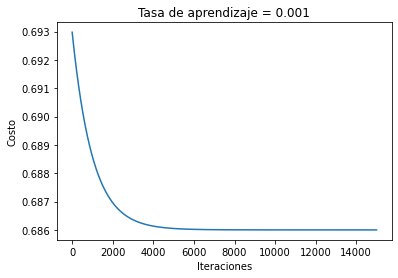

In [15]:
plt.plot(costs)
plt.ylabel('Costo')
plt.xlabel('Iteraciones')
plt.title("Tasa de aprendizaje = 0.001" )
plt.show()